# Reconhecimento de dígitos utilizando MNIST

### Alunos:
- Fábio Silva Campos Melo
- Guilherme Moreira Nunes
- Paulo Henrique dos Santos Souza

### Problema:
O MNIST é um conjunto de dados contendo imagens de dígitos manuscritos. Neste projeto, foi desenvolvida uma rede neural convolucional que utiliza o conjunto de dados MNIST para treinamento. Como resultado, aplicamos essa rede neural a uma foto contendo números manuscritos, permitindo que ela identifique quais dígitos foram escritos na imagem.

### Imports

O pandas é uma biblioteca utilizada para manipulação e análise de dados. No contexto mencionado, ele foi utilizado para extrair os dados do MNIST disponibilizados em formato CSV, permitindo a leitura e a manipulação dos dados de maneira eficiente.

O numpy é uma biblioteca fundamental para computação numérica em Python. Ele oferece suporte a operações matemáticas avançadas, como operações em vetores e matrizes, além de fornecer funções úteis para cálculos estatísticos, manipulação de dados e transformações.

O Keras é uma biblioteca de alto nível para construção e treinamento de redes neurais. Ela oferece uma interface simplificada e intuitiva para criar modelos de aprendizado profundo, incluindo redes neurais convolucionais, que são especialmente adequadas para o processamento de imagens. No contexto mencionado, o Keras é usado para treinar o modelo de rede neural convolucional com base nos dados do MNIST.

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [27]:

# carregar dados do arquivo CSV
df = pd.read_csv('dataset/mnist_train.csv')

# extrair coluna de rótulos (labels)
y = df['label'].values

# extrair colunas de pixels e convertê-los em arrays de imagem
x = df.iloc[:, 1:].values.reshape(df.shape[0], 28, 28, 1)

# normalizar valores dos pixels para [0,1]
x = x.astype('float32')
x /= 255

# converter rótulos em vetores de classes binárias
y = to_categorical(y, 10)


O código apresenta a definição de um modelo de rede neural convolucional usando a biblioteca Keras.

O código apresenta uma arquitetura típica de uma rede neural convolucional para classificação de imagens. A sequência de camadas convolucionais, max pooling, dropout e camadas densas é comumente usada para extrair características das imagens e realizar a classificação final.

In [28]:

# definir modelo
#  Cria uma instância do modelo sequencial, que é uma pilha linear de camadas. Neste caso, é o modelo base para adicionar as camadas subsequentes.
model = Sequential()

# primeira camada convolucional com 32 filtros de tamanho 3x3
# Adiciona uma camada convolucional à rede com 32 filtros de tamanho 3x3. A função de ativação utilizada é a ReLU. A camada recebe uma entrada de tamanho (28, 28, 1), que é o formato das imagens do MNIST.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# segunda camada convolucional com 64 filtros de tamanho 3x3
# Adiciona outra camada convolucional à rede com 64 filtros de tamanho 3x3. A função de ativação utilizada também é a ReLU.
model.add(Conv2D(64, (3, 3), activation='relu'))

# camada de max pooling com tamanho de janela 2x2
# Adiciona uma camada de max pooling à rede, com uma janela de tamanho 2x2. O max pooling reduz a dimensionalidade da saída das camadas anteriores, preservando as características mais importantes.
model.add(MaxPooling2D((2, 2)))

# camada de dropout para evitar overfitting
# Adiciona uma camada de dropout à rede com uma taxa de dropout de 0.25. O dropout é uma técnica de regularização que ajuda a evitar overfitting, desativando aleatoriamente uma fração dos neurônios durante o treinamento.
model.add(Dropout(0.25))

# camada de achatamento para converter a saída em um vetor 1D
# Adiciona uma camada de achatamento à rede, que transforma a saída das camadas anteriores em um vetor unidimensional. Isso é necessário para conectar a camada densa subsequente.
model.add(Flatten())

# camada densa com 128 neurônios e função de ativação ReLU
# Adiciona uma camada densa à rede com 128 neurônios. A função de ativação utilizada é a ReLU.
model.add(Dense(128, activation='relu'))

# camada de dropout para evitar overfitting
# Adiciona outra camada de dropout à rede com uma taxa de dropout de 0.5.
model.add(Dropout(0.5))

# camada de saída com 10 neurônios (1 para cada dígito)
# e função de ativação softmax para obter uma distribuição de probabilidade
model.add(Dense(10, activation='softmax'))


In [29]:

# compilar modelo com função de perda categorical cross-entropy,
# otimizador Adam e métrica de acurácia
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [30]:

# treinar modelo
model.fit(x, y,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.2)

# salvar modelo treinado
model.save('mnist_model.h5')

Epoch 1/10


2023-05-19 23:03:16.028430: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 [==============================] - 36s 94ms/step - loss: 0.2818 - accuracy: 0.9144 - val_loss: 0.0631 - val_accuracy: 0.9818
Epoch 2/10
375/375 [==============================] - 38s 100ms/step - loss: 0.0941 - accuracy: 0.9723 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 3/10
375/375 [==============================] - 38s 100ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.0429 - val_accuracy: 0.9876
Epoch 4/10
375/375 [==============================] - 37s 100ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 5/10
375/375 [==============================] - 37s 100ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0372 - val_accuracy: 0.9892
Epoch 6/10
375/375 [==============================] - 37s 100ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0364 - val_accuracy: 0.9898
Epoch 7/10
375/375 [==============================] - 38s 100ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0360 - val_accuracy: 0.98

In [4]:
from tensorflow.keras.models import load_model

# carregar dados de teste do arquivo CSV
df_test = pd.read_csv('dataset/mnist_test.csv')

# extrair colunas de pixels e remover a primeira coluna de rótulos
x_test = df_test.iloc[:, 1:].values

# normalizar valores dos pixels para [0,1] e redimensionar para o formato esperado pelo modelo
x_test = x_test.astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1)

# carregar modelo treinado
model = load_model('mnist_model.h5')

# extrair coluna de rótulos e converter para array numpy
y_test = df_test.iloc[:, 0].values

# avaliar modelo nos dados de teste
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# imprimir acurácia
acc = np.mean(y_pred == y_test)
print('Test accuracy:', acc)

2023-05-23 17:03:10.342897: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-23 17:03:10.695865: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step
Test accuracy: 0.9918


In [13]:
import cv2
import matplotlib.pyplot as plt

def recortar_numeros(imagem):
    # Carregar a imagem
    img = cv2.imread(imagem)

    # Converter a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Binarizar a imagem usando um valor de limiar adequado
    _, img_thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Encontrar contornos dos objetos na imagem binarizada
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma lista para armazenar as informações dos contornos
    contornos = []

    # Iterar sobre os contornos encontrados
    for contour in contours:
        # Obter o retângulo delimitador do contorno
        (x, y, w, h) = cv2.boundingRect(contour)
        
        # Ignorar contornos muito pequenos ou muito grandes
        if w * h < 100 or w * h > 10000:
            continue


        # Adicionar as informações do contorno à lista
        contornos.append((x, y, w, h))

    # Ordenar os contornos com base na coordenada x
    contornos = sorted(contornos, key=lambda c: c[0])

    # Criar uma lista para armazenar as imagens recortadas dos números
    numeros_recortados = []

    # Recortar os números da imagem original na ordem correta
    for (x, y, w, h) in contornos:
        numero_recortado = img[y:y+h, x:x+w]
        numero_redimensionado = cv2.resize(numero_recortado, (28, 28))
        numeros_recortados.append(numero_redimensionado)

    return numeros_recortados

# Caminho da imagem com os números
# caminho_imagem = 'numeros_manuscrito.jpg'
caminho_imagem = 'numeros_1.jpeg'

# Chamar a função para recortar os números da imagem
numeros_recortados = recortar_numeros(caminho_imagem)

# Exibir os números recortados usando matplotlib
fig = plt.figure()


# Preprocessar as imagens recortadas e fazer as previsões com o modelo
previsoes = []
for numero in numeros_recortados:
    # Redimensionar o número para o tamanho esperado pelo modelo
    numero_redimensionado = cv2.resize(numero, (28, 28))

    # Converter o número para escala de cinza
    numero_redimensionado_gray = cv2.cvtColor(numero_redimensionado, cv2.COLOR_BGR2GRAY)

    # Binarizar o número usando um valor de limiar adequado
    _, numero_thresh = cv2.threshold(numero_redimensionado_gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Expandir as dimensões do número para o formato esperado pelo modelo
    numero_expandido = np.expand_dims(numero_thresh, axis=-1)
    numero_expandido = np.expand_dims(numero_expandido, axis=0)

    # Fazer a previsão com o modelo
    previsao = model.predict(numero_expandido)
    previsao = np.argmax(previsao)
    previsoes.append(previsao)


1/1 [==============================] - 0s 17ms/step


<Figure size 640x480 with 0 Axes>

In [14]:

# Imprimir as previsões
print('Previsões:', previsoes)


Previsões: [3, 2, 3, 3, 4, 5, 2, 2, 2, 5]


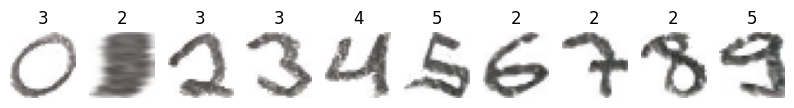

In [15]:

# Exibir as imagens recortadas
fig, axs = plt.subplots(1, len(numeros_recortados), figsize=(10, 2))
for i, numero in enumerate(numeros_recortados):
    axs[i].imshow(numero, cmap='gray')
    axs[i].set_title('{}'.format(previsoes[i]))
    axs[i].axis('off')
plt.show()

for i, numero_recortado in enumerate(numeros_recortados):
    ax = fig.add_subplot(1, len(numeros_recortados), i+1)
    ax.imshow(cv2.cvtColor(numero_recortado, cv2.COLOR_BGR2RGB))
    ax.axis('off')